In [1]:
#Imports
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from modules.aux_functions import testResult
import os


Bad key "text.kerning_factor" on line 4 in
C:\Users\bcpython\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
ops.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph()>

In [3]:
#Emotions dictionary
emotion = {0:'anger',
          1:'disgust',
          2:'fear',
          3:'happy',
          4:'sad',
          5:'surprise',
          6:'neutral'}

In [4]:
#Function that turns RGB images into gray, multiplying by the image RGB values by specific RGB values ([0.299, 0.587,0.114])
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587,0.114])

In [5]:
sess = tf.InteractiveSession()

In [6]:
new_saver = tf.train.import_meta_graph('model/model.ckpt-1400.meta')
new_saver.restore(sess,'model/model.ckpt-1400')

INFO:tensorflow:Restoring parameters from model/model.ckpt-1400


In [7]:
x = sess.graph.get_tensor_by_name('input:0')
y_conv = sess.graph.get_tensor_by_name('output:0')

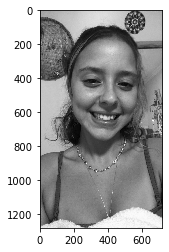

In [8]:
img = mpimg.imread('test_images/2.jpeg')
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))

In [9]:
#Reshaping the image to match the model size and running 100 evaluations
image_0 = np.resize(gray, (1,48,48,1))
tResult = testResult()
num_evaluations = 100

In [10]:
for i in range(0, num_evaluations):
    result = sess.run(y_conv, feed_dict={x:image_0})
    label = sess.run(tf.argmax(result, 1))
    label = label[0]
    label = int(label)
    tResult.evaluate(label)
tResult.display_result(num_evaluations)

anger = 1.0%
disgust = 0.0%
fear = 9.0%
happy = 89.0%
sad = 0.0%
suprised = 1.0%
